# Logistic Regression

dataset:
https://r-data.pmagunia.com/dataset/r-dataset-package-islr-default

In [110]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
import seaborn as sns

In [111]:
df = pd.read_csv("default.csv")
print(df.shape)
df.head()


(10000, 4)


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [112]:
df['default'].unique()

array(['No', 'Yes'], dtype=object)

In [113]:
df['default'] = 1*(df['default'] == 'Yes')
df.head()

,default,student,balance,income
0,0,No,729.526495,44361.625074
1,0,Yes,817.180407,12106.134700
2,0,No,1073.549164,31767.138947
3,0,No,529.250605,35704.493935
4,0,No,785.655883,38463.495879


In [114]:
df = pd.get_dummies(df, columns=['student'], drop_first=True)
X = df.drop('default', axis=1)
y= df['default']
df.head()

,default,balance,income,student_Yes
0,0,729.526495,44361.625074,0
1,0,817.180407,12106.134700,1
2,0,1073.549164,31767.138947,0
3,0,529.250605,35704.493935,0
4,0,785.655883,38463.495879,0


<AxesSubplot:xlabel='balance', ylabel='default'>

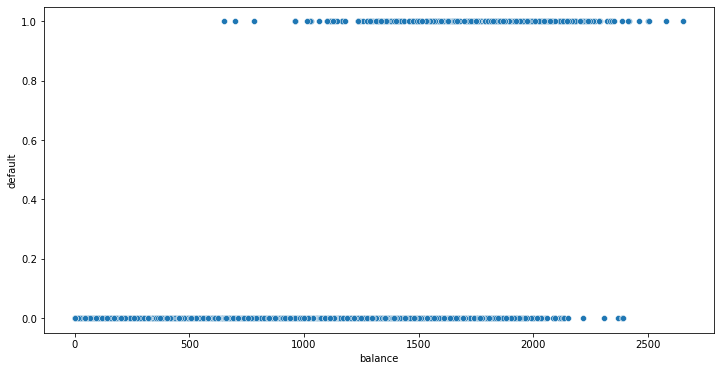

In [115]:
fig, ax =plt.subplots(figsize=(12,6))
sns.scatterplot(data=df, x='balance', y='default', ax=ax)

In [116]:
X_train,X_test,y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.2)

In [118]:
X_train

,balance,income,student_Yes
2694,1804.036475,31318.296026,0
5140,1174.194909,35533.484519,0
2568,978.652180,25742.119731,0
3671,548.136289,19501.341068,1
7427,270.072593,36833.645138,0
...,...,...,...
2895,1270.092810,16809.006452,1
7813,1598.020831,39163.361056,0
905,1234.476479,31313.374575,0
5192,0.000000,29322.631394,0


### Predicting with linear regression

In [119]:
linear_model = LinearRegression()
linear_model.fit(X_train[['balance']], y_train)

#predict on training 
y_pred_train = linear_model.predict(X_train[["balance"]])

#predict on test
y_pred_test = linear_model.predict(X_test[["balance"]])



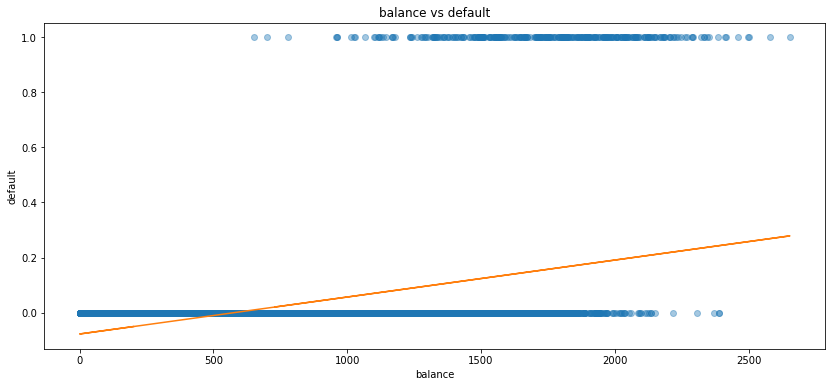

In [120]:
fig, axes = plt.subplots(figsize=(14,6))
axes.plot(df["balance"],df['default'], "o" ,alpha =0.4)
axes.plot(df['balance'], linear_model.predict(df[['balance']]))
axes.set_xlabel("balance")
axes.set_ylabel("default")
axes.set_title("balance vs default")
plt.show()

### Logistic Regression

In [121]:
### Naive model

print(df['default'].value_counts())

naive_accuracy = df['default'].value_counts()[0]/ len(df['default'])

print(f"Naive accuracy is: {naive_accuracy:.4f}")



0    9667
1     333
Name: default, dtype: int64
Naive accuracy is: 0.9667


In [124]:
logit_model = LogisticRegression(penalty='none')
logit_model.fit(X_train[['balance']], y_train)

#predict on training 
y_pred_train = logit_model.predict(X_train[["balance"]])

#predict on test
y_pred_test = logit_model.predict(X_test[["balance"]])
y_train_prob = logit_model.predict_proba(X_train[["balance"]])
accuracy = logit_model.score(X_test[['balance']],y_test)
accuracy_train = logit_model.score(X_train[['balance']],y_train)

print(f'The accuracy for this model on test is {accuracy*100:.4f}')
print(f'The accuracy for this model on train is {accuracy_train*100:.4f}')


The accuracy for this model on test is 97.4500
The accuracy for this model on train is 97.1500


In [128]:
y_train_prob = logit_model.predict_proba(X_train[["balance"]])
y_train_prob[:10,]

array([[6.53328649e-01, 3.46671351e-01],
       [9.86118497e-01, 1.38815029e-02],
       [9.95458975e-01, 4.54102524e-03],
       [9.99618469e-01, 3.81531333e-04],
       [9.99923129e-01, 7.68712339e-05],
       [9.32730182e-01, 6.72698177e-02],
       [9.19445796e-01, 8.05542038e-02],
       [9.99698854e-01, 3.01146465e-04],
       [9.98735552e-01, 1.26444758e-03],
       [9.95851251e-01, 4.14874926e-03]])

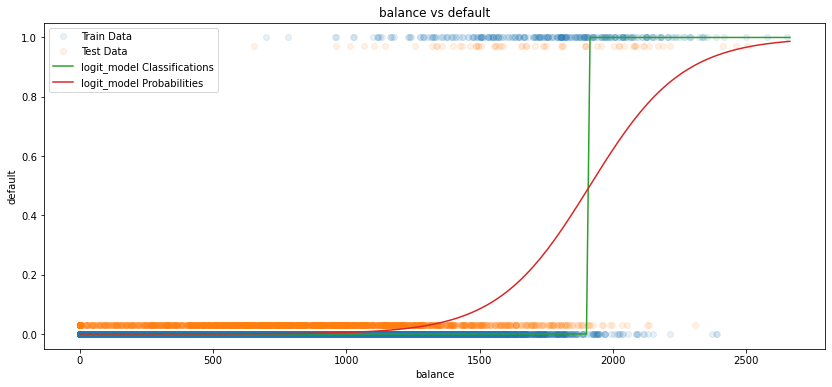

In [125]:
fig, axes = plt.subplots(figsize=(14,6))

x=np.linspace(np.min(df[['balance']]),np.max(df[['balance']])+10,200)

yhat_class_logit = logit_model.predict(x)
yhat_prob_logit = logit_model.predict_proba(x)[:,1]

# plot the observed data
axes.plot(X_train['balance'], y_train, 'o' ,alpha=0.1, label='Train Data')
axes.plot(X_test['balance'], 0.94*y_test+0.03, 'o' ,alpha=0.1, label='Test Data')

# plot the predictions
axes.plot(x, yhat_class_logit, label='logit_model Classifications')
axes.plot(x, yhat_prob_logit, label='logit_model Probabilities')
axes.set_title("balance vs default")
plt.legend(loc='best')
axes.set_xlabel("balance")
axes.set_ylabel("default")

plt.show()




$$y = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p $$

### Predictions

In [129]:
logit_model.coef_

array([[0.00576259]])

In [130]:
logit_model.intercept_

array([-11.02961851])

$$ P(Y=1 | x=2000;\beta) = \frac{1}{ 1 + e^(-(-11.00296  +.0.005762*balance))} $$

In [101]:
import math
b0 = logit_model.intercept_
b1 = logit_model.coef_

z = -1*(b0+2000*b1) 

y = 1 / (1+(math.exp(z)))
print(f'probability of defaulting is  :{y:.2f} ')

probability of defaulting is  :0.62 


In [131]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_curve, roc_auc_score
)            

In [132]:
cf_matrix_caucasian = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix for Caucasian:")
print(cf_matrix_caucasian)

Confusion matrix for Caucasian:
[[1930   11]
 [  40   19]]


In [134]:
(cf_matrix_caucasian[0][0]+ cf_matrix_caucasian[1][1])/ (len(y_test))

0.9745